<a href="https://colab.research.google.com/github/zeineb-ouerghi/Capstone-Project-/blob/main/Capstone_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project 
### MetaData For the Spaced Repitition Dataset from Duolingo
* p_recall - proportion of exercises from this lesson/practice where the word/lexeme was correctly recalled
* timestamp - UNIX timestamp of the current lesson/practice
* delta - time (in seconds) since the last lesson/practice that included this word/lexeme
* user_id - student user ID who did the lesson/practice (anonymized)
learning_language - language being learned
* ui_language - user interface language (presumably native to the student)
* lexeme_id - system ID for the lexeme tag (i.e., word)
* lexeme_string - lexeme tag (see below)
* history_seen - total times user has seen the word/lexeme prior to this lesson/practice
* history_correct - total times user has been correct for the word/lexeme prior to this lesson/practice
* session_seen - times the user saw the word/lexeme during this lesson/practice
* session_correct - times the user got the word/lexeme correct during this lesson/practice

###Installing Packages 

In [1]:
#installing packages 
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 11.3 MB 36.3 MB/s 
     |████████████████████████████████| 1.7 MB 42.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.0
    Uninstalling pandas-0.25.0:
      Successfully uninstalled pandas-0.25.0


In [ ]:
pip install parquet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 361 kB 7.8 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
  Created wheel for thriftpy2: filename=thriftpy2-0.4.14-cp37-cp37m-linux_x86_64.whl size=953337 sha256=02f5f661a11c07f070c13f63b0fd7930095fc714b7964e4cfe0a108d03305350
  Stored in directory: /root/.cache/pip/wheels/2a/f5/49/9c0d851aa64b58db72883cf9393cc824d536bdf13f5c83cff4
Successfully built thriftpy2


In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 6.0 MB/s 
     |████████████████████████████████| 102 kB 5.2 MB/s 
     |████████████████████████████████| 690 kB 37.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 52.5 MB/s 
     |████████████████████████████████| 4.7 MB 46.0 MB/s 
     |████████████████████████████████| 296 kB 44.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=9b76631e7f9dd0f1d7c4d0e1c601c90663481e9fa99d12486779d38b278c4375
  Stored in directory: /tmp/pip-ephem-wheel-cache-xrdcvcpe/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f279e6562daa3ee476c3a20c2de860684f86bb2e8fa3e6ca3870ebcf2e98e52f
  Stored in directory: /root/.cache/pip/whee

In [ ]:
! pip install pandas==0.25.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pandas-profiling==2.7.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.1 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 
     |████████████████████████████████| 1.6 MB 49.8 MB/s 
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.4.0
    Uninstalling pandas-profiling-3.4.0:
      Successfully uninstalled pandas-profiling-3.4.0


###Importing Libraries 

In [2]:
#importing from pandas_profilinh
from datetime import datetime
from pathlib import Path
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
# Load packages
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    RocCurveDisplay,
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Data Acquisition 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
## data acquisition 
## Spaced repetition DATA from Duolingo Research 
dataframe = pd.read_csv("/content/drive/MyDrive/Capstone Project/duolingodata.csv.gz")
dataframe.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [7]:
from pandas_profiling import ProfileReport 
profile = ProfileReport(dataframe)

In [41]:
#ProfileReport(dataframe)

In [9]:
#data 
x = dataframe['learning_language'].unique()
x

array(['de', 'es', 'pt', 'en', 'fr', 'it'], dtype=object)

In [32]:
language = dataframe.groupby(["learning_language"])["learning_language"]
print(language)

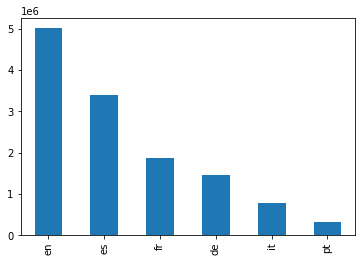

In [26]:
dataframe['learning_language'].value_counts().plot(kind='bar')

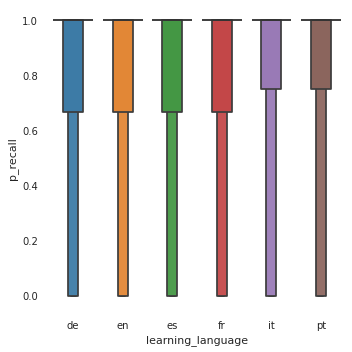

In [19]:
#diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=dataframe.sort_values("learning_language"),
    x="learning_language", y="p_recall", kind="boxen"
)

In [20]:
import plotly.express as px
%matplotlib inline
df = px.data.tips()
fig = px.histogram(dataframe, x="learning_language")
fig.show(renderer = "colab")

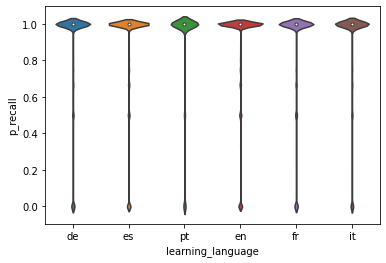

In [19]:
#look at the p_recall based on the language learned 
# We have the choice of 6 languages: Deutsche, Espanol, Portuguese, English, French, Italian
sns.violinplot(x = dataframe["learning_language"], y = dataframe["p_recall"])

In [15]:
import plotly.express as px
import plotly.graph_objects as go

fig_price = px.violin(
    dataframe, 
    x="learning_language", 
    y="p_recall", 
    color='learning_language'
)
fig_price.show()

###Data Investigation

In [ ]:
dataframe.describe()

In [ ]:
dataframe.info()

In [ ]:
#check if there are null values + drop the rows if they have null
percent_null = [(i, dataframe[i].isnull().mean()) for i in dataframe]
columns = ("Column", "% null values")
percents = pd.DataFrame(percent_null, columns=columns)
display(percents)


In [ ]:
# Create a dataframe with the counts by income class and occupation
counts_df = census.groupby(["income", "race"])["workclass"].count().unstack()
# then transpose one more time for plotting
race_percents_df = counts_df.T.div(counts_df.T.sum()).T
fig, ax = plt.subplots(figsize=(12,8))

race_percents_df.plot(kind="bar", stacked=True, ax=ax)

ax.set_xlabel("Income Class")
ax.set_ylabel("Proportion")
plt.xticks(rotation=0)
ax.legend()

fig.suptitle("Race Proportion by Income class");

###Data Manipulation 
Adding more variables to the datasets to emphasize the error making process and the e

In [34]:
#Data Cleaning and Manipulation 
# we will only look at users learning french 
data = dataframe[dataframe.learning_language == "fr"]
#data.head()
#adding variables 
#adding number of mistakes made 
data['mistakes'] = data.history_seen - data.history_correct
data['session_mistakes'] = data.session_seen - data.session_correct
data['rate_of_error_per_session'] = data.session_mistakes/data.session_seen
data['general_rate_of_error'] = data.mistakes/data.history_seen 
# unit='s' to convert it into epoch time
data['Datetime'] = pd.to_datetime(data['timestamp'], 
                                  unit='s')
data.head()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error,Datetime
231,1.0,1362082530,261691,u:hiS4,fr,en,03a546003e03b545a6d419b6620b3749,la/le<det><def><f><sg>,31,23,1,1,8,0,0.0,0.258065,2013-02-28 20:15:30
232,0.5,1362082530,231391,u:hiS4,fr,en,8bd6d060bb604e17c936418f835d87c8,mon/mon<det><pos><m><sg>,28,27,2,1,1,1,0.5,0.035714,2013-02-28 20:15:30
233,1.0,1362082530,232832,u:hiS4,fr,en,1b279bb64bd6eba51ab37e4a61aad0c4,mes/mon<det><pos><mf><pl>,2,2,1,1,0,0,0.0,0.000000,2013-02-28 20:15:30
234,1.0,1362082530,196898,u:hiS4,fr,en,8e6df998cc5c26b86482a3040a5805e2,c'/ce<prn><tn><nt><sg>,19,18,1,1,1,0,0.0,0.052632,2013-02-28 20:15:30
235,0.0,1362082530,274171,u:hiS4,fr,en,3ec6ed7d5a122ac3018def0b4f621b12,nouveau/nouveau<adj><m><sg>,6,5,1,0,1,1,1.0,0.166667,2013-02-28 20:15:30


In [35]:
#investigate the correlation data 
correlation_data = data.corr()
correlation_data.style.background_gradient()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error
p_recall,1.000000,-0.000751,-0.030109,0.003072,0.010392,0.048894,0.322012,-0.046783,-0.820034,-1.000000,-0.097067
timestamp,-0.000751,1.000000,0.016846,0.002858,0.003995,0.009478,0.008578,-0.005511,0.003622,0.000751,-0.004796
delta,-0.030109,0.016846,1.000000,-0.064134,-0.063180,0.000305,-0.009236,-0.053621,0.028840,0.030109,-0.010883
history_seen,0.003072,0.002858,-0.064134,1.000000,0.995407,-0.024173,-0.020284,0.767176,-0.014054,-0.003072,-0.005449
history_correct,0.010392,0.003995,-0.063180,0.995407,1.000000,-0.023886,-0.017659,0.702248,-0.021085,-0.010392,-0.032779
session_seen,0.048894,0.009478,0.000305,-0.024173,-0.023886,1.000000,0.947328,-0.019726,0.254526,-0.048894,0.047253
session_correct,0.322012,0.008578,-0.009236,-0.020284,-0.017659,0.947328,1.000000,-0.032523,-0.068598,-0.322012,0.010460
mistakes,-0.046783,-0.005511,-0.053621,0.767176,0.702248,-0.019726,-0.032523,1.000000,0.036759,0.046783,0.179110
session_mistakes,-0.820034,0.003622,0.028840,-0.014054,-0.021085,0.254526,-0.068598,0.036759,1.000000,0.820034,0.115611
rate_of_error_per_session,-1.000000,0.000751,0.030109,-0.003072,-0.010392,-0.048894,-0.322012,0.046783,0.820034,1.000000,0.097067


In [36]:
data.ui_language.unique()

array(['en'], dtype=object)

In [37]:
# Check if there are any null values
print(data.isnull().sum())

p_recall                     0
timestamp                    0
delta                        0
user_id                      0
learning_language            0
ui_language                  0
lexeme_id                    0
lexeme_string                0
history_seen                 0
history_correct              0
session_seen                 0
session_correct              0
mistakes                     0
session_mistakes             0
rate_of_error_per_session    0
general_rate_of_error        0
Datetime                     0
dtype: int64


In [38]:
X = data.iloc[:, 8:16]

In [39]:
X = data.iloc[:, 8:16]
#timestamp = data["timestamp"]
#X = X + timestamp
#target variable is the number of recall times 
y = data["p_recall"] 
X

,history_seen,history_correct,session_seen,session_correct,mistakes,session_mistakes,rate_of_error_per_session,general_rate_of_error
231,31,23,1,1,8,0,0.00,0.258065
232,28,27,2,1,1,1,0.50,0.035714
233,2,2,1,1,0,0,0.00,0.000000
234,19,18,1,1,1,0,0.00,0.052632
235,6,5,1,0,1,1,1.00,0.166667
...,...,...,...,...,...,...,...,...
12854112,5,4,4,3,1,1,0.25,0.200000
12854113,6,6,1,1,0,0,0.00,0.000000
12854114,6,4,2,2,2,0,0.00,0.333333
12854115,5,3,5,5,2,0,0.00,0.400000


#Neural Networks 

In [21]:
# Splitting the data into train and test subsets
# will adjust the random state
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X , y, 
                                                                    test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, 
                                                test_size=0.5)


In [22]:
# Standardize X data based on X_train
sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

##Creating the Model : 
Defining teh neural network model, we will create a Keras model that we can train with the data. 
- Inputs 

In [23]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Adding an input layer
model.add(Dense(10, input_shape=(8,), activation="relu"))

# Adding an output layer
model.add(Dense(1, activation = 'sigmoid'))

# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


##Model Parameters 


In [26]:
# Parameters 
connected_layers = 3 
connected_size = 50 
connected_activation = "relu"

In [25]:
# Hyperparameters
epochs = 50
batch_size = 128
learning_rate = 0.01

###Compiling the model

In [27]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))


Epoch 1/10
40988/40988 [==============================] - 115s 3ms/step - loss: 0.1608 - accuracy: 0.8812 - val_loss: 0.0919 - val_accuracy: 0.8927
Epoch 2/10
40988/40988 [==============================] - 113s 3ms/step - loss: 0.1105 - accuracy: 0.8896 - val_loss: 0.0777 - val_accuracy: 0.8932
Epoch 3/10
40988/40988 [==============================] - 114s 3ms/step - loss: 0.0969 - accuracy: 0.8913 - val_loss: 0.1243 - val_accuracy: 0.8866
Epoch 4/10
40988/40988 [==============================] - 102s 2ms/step - loss: 0.0919 - accuracy: 0.8919 - val_loss: 0.0776 - val_accuracy: 0.8931
Epoch 5/10
40988/40988 [==============================] - 119s 3ms/step - loss: 0.0886 - accuracy: 0.8922 - val_loss: 0.0806 - val_accuracy: 0.8923
Epoch 6/10
40988/40988 [==============================] - 86s 2ms/step - loss: 0.0879 - accuracy: 0.8923 - val_loss: 0.0792 - val_accuracy: 0.8930
Epoch 7/10
40988/40988 [==============================] - 90s 2ms/step - loss: 0.0852 - accuracy: 0.8925 - val_lo

##Plotting cost and accuracy during training 

We plot the way the accuracy and the loss change during training for the training and the validation data. 

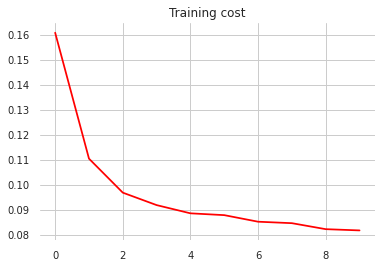

In [29]:
#plotting cost and accuracy during training 

plt.plot(range(len(hist.history["loss"])),
         hist.history["loss"], color="red")
plt.title("Training cost")
plt.grid()

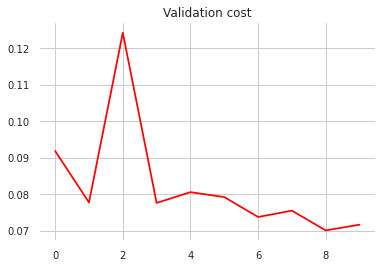

In [30]:
plt.plot(range(len(hist.history["val_loss"])), hist.history["val_loss"], color="red")
plt.title("Validation cost")
plt.grid()

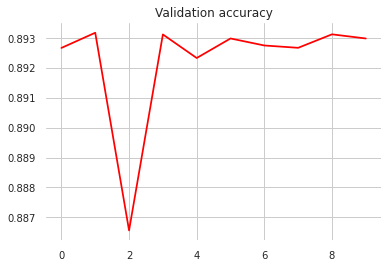

In [31]:
plt.plot(range(len(hist.history["val_accuracy"])), hist.history["val_accuracy"], color="red")
plt.title("Validation accuracy")
plt.grid()

In [32]:
test_results = model.evaluate(X_test,
                              Y_test,
                              batch_size=None,
                              verbose=1)

print("Test accuracy = {}".format(test_results[1]))

8784/8784 [==============================] - 16s 2ms/step - loss: 0.0711 - accuracy: 0.8935
Test accuracy = 0.8934537172317505


### References:
Data can be downloaded here :
***
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/23ZWVI
@data{DVN/23ZWVI_2020,
author = {Kevin Yancey and Burr Settles},
publisher = {Harvard Dataverse},
title = {{Replication Data for: A Sleeping, Recovering Bandit Algorithm for Optimizing Recurring Notifications}},
year = {2020},
version = {V1},
doi = {10.7910/DVN/23ZWVI},
url = {https://doi.org/10.7910/DVN/23ZWVI}
}

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/N8XJME
@data{DVN/N8XJME_2017,
author = {Settles, Burr},
publisher = {Harvard Dataverse},
title = {{Replication Data for: A Trainable Spaced Repetition Model for Language Learning}},
year = {2017},
version = {V1},
doi = {10.7910/DVN/N8XJME},
url = {https://doi.org/10.7910/DVN/N8XJME}
}
***

#### Code Will be Updated regularly on Github:
https://github.com/zeineb-ouerghi/Capstone-Project-Senior-Year-/upload/main
